In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import geopandas as gp
import pycountry

import sys

sys.path.insert(0, "../Notebooks/Functions")
import StatsFunctions as MF

In [2]:
DF = pd.read_csv("../Data/avgIQpercountry.csv")

In [4]:
#Renamed for easier access
DF.rename(
    {
        "Average IQ": "IQ",
        "Literacy Rate": "Literacy",
        "Nobel Prices": "Nobels",
        "HDI (2021)": "HDI",
        "Mean years of schooling - 2021": "SchoolYears",
        " GNI - 2021": "GNI",
        "Population - 2023": "Population",
    },
    axis=1,
    inplace=True,
)

In [5]:
DF = DF.astype({"Population": "float64"})

In [6]:
order = DF["Country"].copy().to_list()
colours = dict(zip(DF["Continent"].unique(), sns.color_palette("Paired")))
kwargs = {"hue": "Continent", "palette": colours, "edgecolor": "black", "alpha": 0.8}
# At a very late stage made a colour pallete for continents only

In [7]:
DF.dropna(how='any', inplace=True)

In [36]:
DF["Continent"].unique()

array(['Asia', 'Europe', 'North America', 'Oceania', 'Europe/Asia',
       'Central America', 'South America', 'Africa'], dtype=object)

In [8]:
#wanted to see if group by will be useful, but seaborn does it for me already
Continents = DF.groupby("Continent").agg(
    {"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"}
)

In [9]:
#Thought might use later
less_10 = (
    DF.query("Population < 10000000")
    .groupby("Continent")
    .agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})
    .sum()
)
over_10 = (
    DF.query("Population > 10000000")
    .groupby("Continent")
    .agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})
)

In [38]:

#Not significant
fig = px.sunburst(
    DF.query("Population > 50_000_000"),
    path=["Continent", "Country"],
    values="Population",
    width=1000,
    height=600,
    title="Countries by population",
)
fig.show()

In [11]:
def heatmap(data, title=""):
    corr = data.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(corr.columns), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=45)
    ax.set_yticks(ticks)
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)

    matrix = pd.DataFrame(data.corr(method="pearson")).round(2)
    
    for i in range(len(matrix)):
        for j in range(len(matrix.iloc[0])):
            text = ax.text(j, i, matrix.iloc[i, j], ha="center", va="center", color="w")
    ax.set_title(title, pad=20)


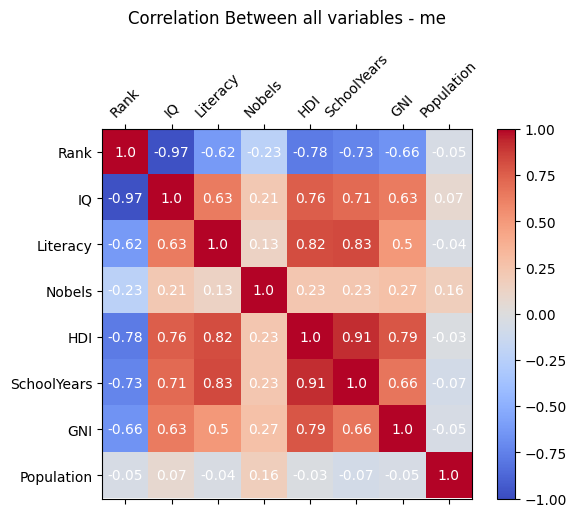

In [12]:
heatmap(
    DF.select_dtypes(include=np.number),
    title="Correlation Between all variables - me",
)

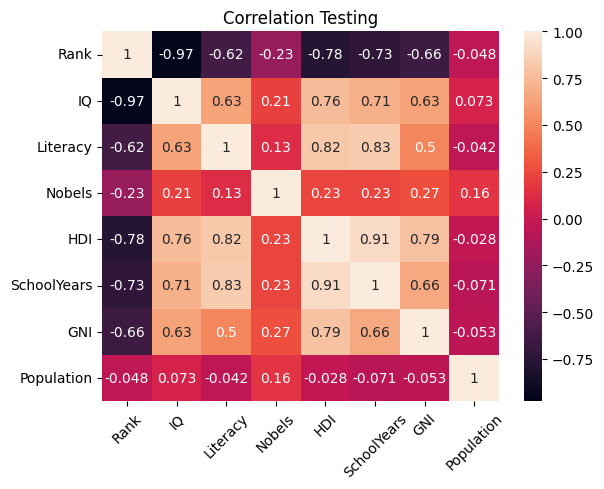

In [13]:
#decided to see pmcc between all variables quickly -> a lot of dependent variables -> need to check per continent
sns.heatmap(
    DF.select_dtypes(include=np.number).corr(method="pearson"), annot=True
)  # tk change heatmap for my example
plt.title("Correlation Testing")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of average IQ')

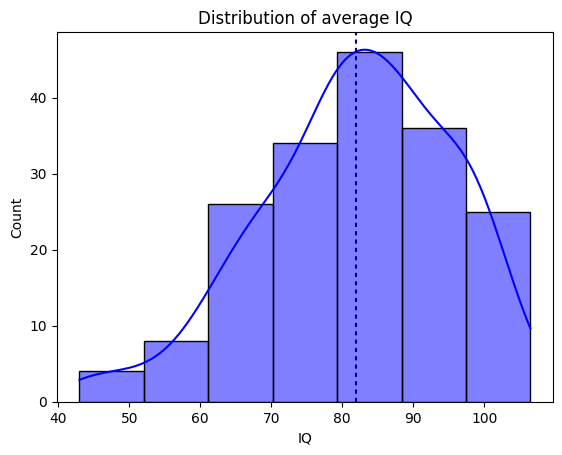

In [14]:
# decided to check average IQ and see how useful it would be
histIQ = sns.histplot(DF, x="IQ", bins=7, kde=True, color="blue")

plt.axvline(
    MF.mean(DF["IQ"]), color="darkblue", label="mean", dashes=(2, 2)
)  # TK change mean to my function

plt.title("Distribution of average IQ")

In [15]:
# #Won't go in final, just to see quickly if I can use something
# sns.pairplot(
#     DF[
#         [
#             "IQ",
#             "Literacy",
#             "Nobels",
#             "HDI",
#             "Continent",
#             "SchoolYears",
#             "GNI",
#         ]
#     ],
#     hue = "Continent"
    
# )

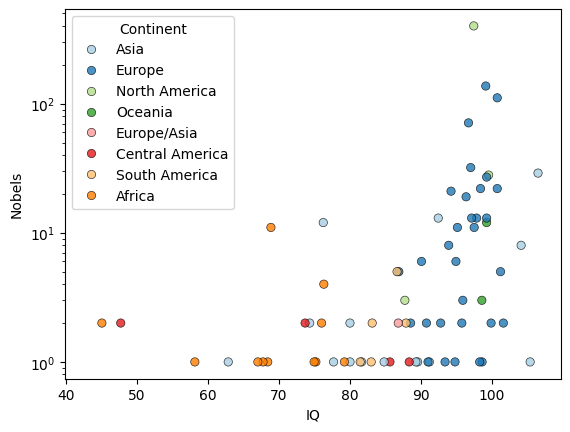

In [16]:
# Desided exprlore correlation between average IQ of a country with how many novel prises the continent won.
# Europe is on average smarter and have more entries due to more countries, but America is a clear outlier
# sns.scatterplot(data=DF, x="IQ", y="Nobels", hue="Continent", palette=colours, edgecolor = "black", alpha = 0.5)
sns.scatterplot(data=DF, x="IQ", y="Nobels", **kwargs)

plt.yscale("log")

Text(0.5, 1.0, 'Distribution of IQ for each continent')

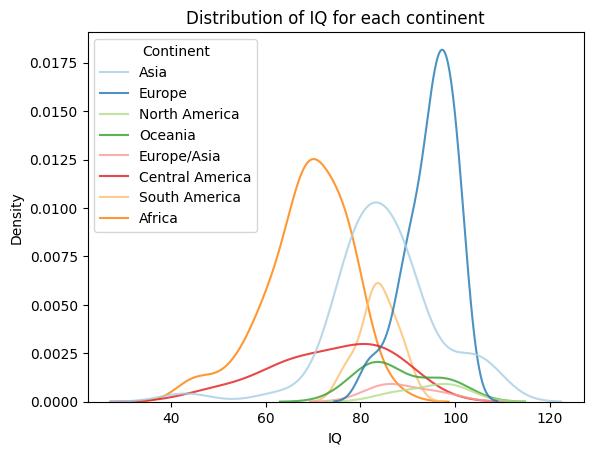

In [17]:
sns.kdeplot(data=DF, x="IQ", **{i:kwargs[i] for i in kwargs if i!='edgecolor'})
plt.title("Distribution of IQ for each continent")

Text(0.5, 1.0, 'Correlation between HDI and GNI')

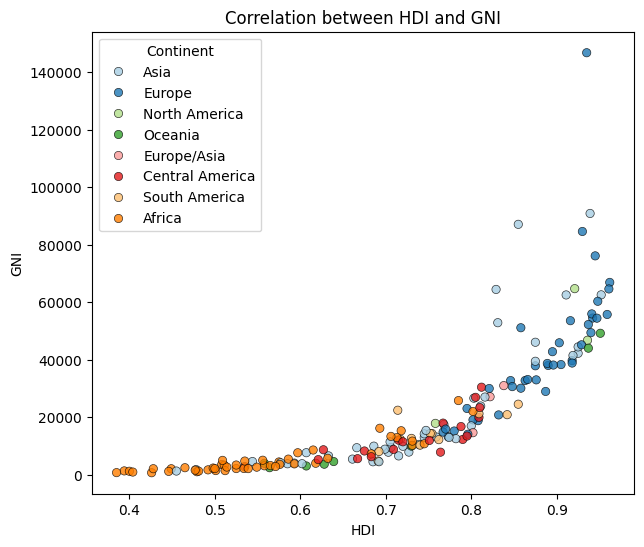

In [18]:
fig, ax = plt.subplots(figsize = (7,6))
sns.scatterplot(data=DF, y="GNI", x="HDI", **kwargs)  
plt.title("Correlation between HDI and GNI")

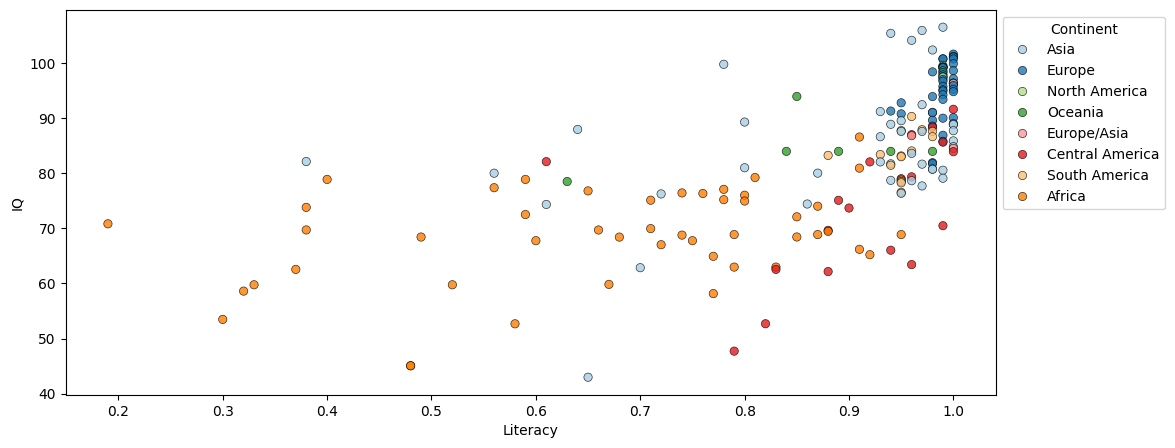

In [19]:
fig, ax = plt.subplots(figsize = (12,5))
sns.scatterplot(data=DF, y="IQ", x="Literacy", **kwargs)  #
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Text(0.5, 1.0, 'Distribution of IQ')

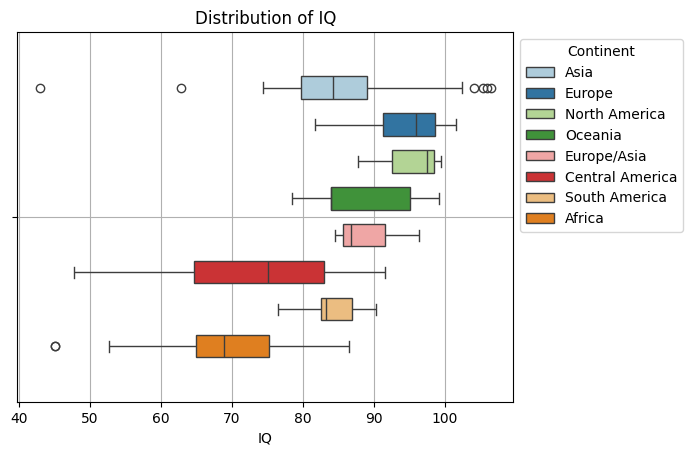

In [20]:
ax = sns.boxplot(data=DF, x="IQ",  gap=0.4, dodge=True, **{i:kwargs[i] for i in kwargs if i not in ['edgecolor', "alpha"]})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()
plt.title("Distribution of IQ")


Text(0.5, 1.0, 'Correlation between years spent in school and literacy rate')

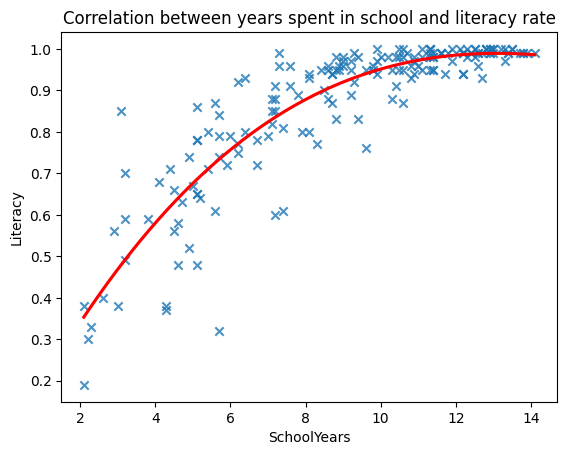

In [21]:
sns.regplot(DF, x = "SchoolYears", y = "Literacy", order=3, ci=0, marker="x", line_kws=dict(color="r")) #TK: come up with own funciton???
plt.title("Correlation between years spent in school and literacy rate")


In [22]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


C:\Users\dima1\AppData\Local\Temp\ipykernel_9892\20647279.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [23]:
rank_location = DF[::]

world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
rank_location['ISO_alpha'] = rank_location['Country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)



C:\Users\dima1\AppData\Local\Temp\ipykernel_9892\1021141429.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\dima1\AppData\Local\Temp\ipykernel_9892\1021141429.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
fig = px.choropleth(
    rank_location.merge(world[["name", "geometry", "iso_a3"]], left_on="Country", right_on = "name", how = "left"),
    locations='iso_a3',
    color='SchoolYears',
    color_continuous_scale='YlOrRd',

    
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.update_layout(title_text='Average length of schooling in countries', title_x=0.5, autosize = True)


fig.show()

In [25]:
fig = px.choropleth(
    rank_location.merge(world[["name", "geometry", "iso_a3"]], left_on="Country", right_on = "name", how = "left"),
    locations='iso_a3',
    color='Literacy',
    color_continuous_scale='YlOrRd',

    
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.update_layout(title_text='Average literacy index of schooling in countries', title_x=0.5, autosize = True)


fig.show()

In [26]:
fig = px.choropleth(
    rank_location.merge(world[["name", "geometry", "iso_a3"]], left_on="Country", right_on = "name", how = "left"),
    locations='iso_a3',
    color='HDI',
    color_continuous_scale='YlOrRd',

    
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.update_layout(title_text='HDI index of schooling in countries', title_x=0.5, autosize = True)


fig.show()

Text(0.5, 1.0, 'Most populated counties')

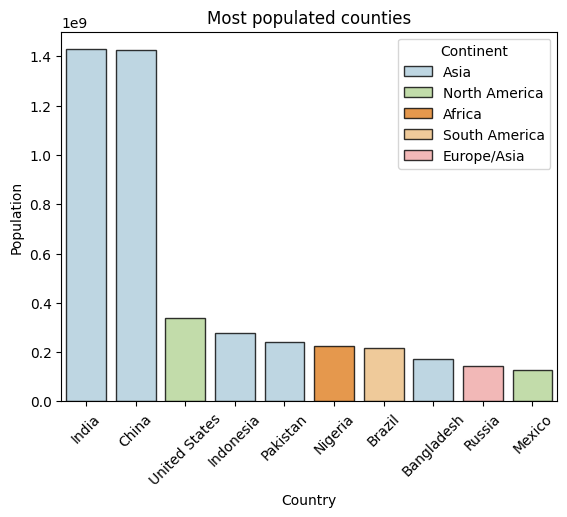

In [28]:
sns.barplot(DF.sort_values(by = "Population", ascending=False).head(10), x= "Country", y = "Population", **kwargs)
plt.xticks(rotation = 45)
plt.title("Most populated counties") #TK - not significant

Text(0.5, 1.0, 'Correlation between HDI and IQ for each country')

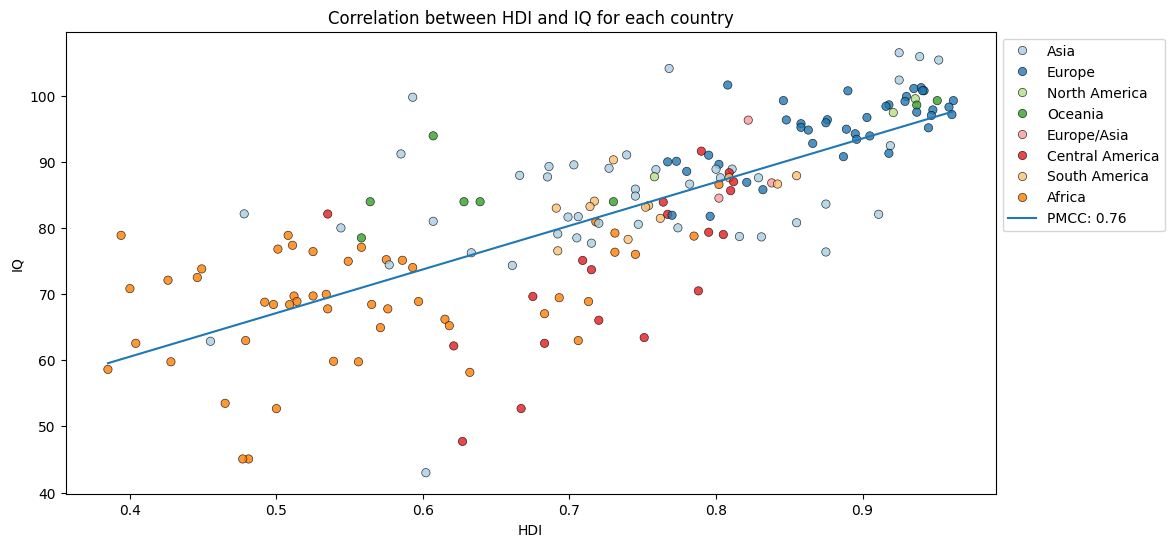

In [34]:
m,q, cor = MF.linear_regression(DF["HDI"].to_list(), DF["IQ"].to_list())

fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(data = DF, x = "HDI", y = "IQ", **kwargs)
sns.lineplot(x = DF["HDI"], y = m * DF["HDI"] + q, label = f'PMCC: {round(cor, 2)}')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Correlation between HDI and IQ for each country")


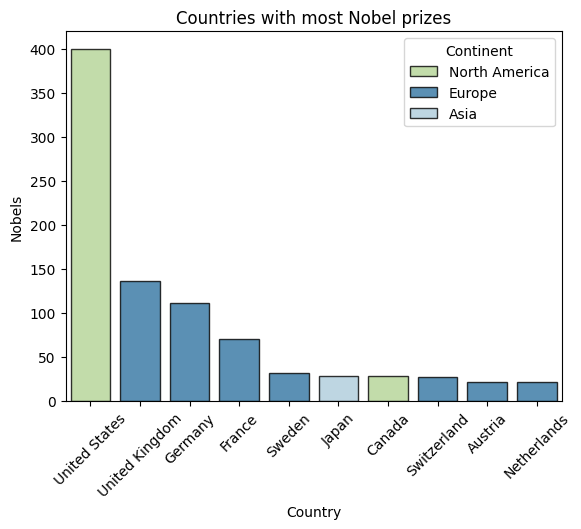

In [32]:
sns.barplot(DF.query("Nobels > 0").sort_values(by  = "Nobels", ascending=False).head(10), x = "Country", y = "Nobels",**kwargs)
plt.xticks(rotation = 45)
plt.title("Countries with most Nobel prizes")
plt.show()

In [39]:
import scipy.stats as ss

In [50]:
x = np.random.rand(1,10).tolist()[0]
y = np.random.rand(1,10).tolist()[0]
print(x,y, sep = "\n")

[0.16503776751270371, 0.9333554107698349, 0.06635496373780148, 0.391925905161544, 0.2903904906517738, 0.5026479582027492, 0.786066430054384, 0.7531657935752609, 0.447151232926997, 0.32274221648060586]
[0.9233610796408839, 0.5488327294250499, 0.15987990458726142, 0.021432404060072185, 0.7604710484264448, 0.5531705376078131, 0.4818162359960605, 0.4199868183230754, 0.6592129905082018, 0.41854571966835763]


In [51]:
ss.linregress(x,y)

LinregressResult(slope=0.004009513814945522, intercept=0.4928029792242724, rvalue=0.004244714724793461, pvalue=0.9907148538367982, stderr=0.3339598830741928, intercept_stderr=0.1793039973307247)